Muwanga Sudaice			        2100712763

Beheram Zena				        2100713518

Mukwaya Shawn Mels		      2100723354

Mukisa Jotham Prince		    2100708970

Wantante Fortune Semeon	    2100712262

#**Suport Vector Machine, K Nearest Neighbors and Gaussian Naive bayes Classifer on The Wine Dataset using Scikitlearn**

## **1. Loading the Dataset and Data Visualization**



---



Load the wine dataset from sklearn using **"from sklearn.datasets import load_wine"** into the notebook. 

Since the dataset is in a csv format, we **import pandas as pd**

The **"load_wine()"** method allows us to use the wine dataset and we give it a name **"wine"** 

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
wine = load_wine()



---



To see the 13 attributes in the dataset we use **"wine.feature_names"**

In [2]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']



---



For our clasification problem, we are classifying the data into 3 classes which are;
1. **'class_0'**
2. **'class_1'**
3. **'class_2'**

To see these class name, we use **"wine.target_name"**

In [3]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')



---



We create a new pandas Dataframe(**df**) that will be assigned to our wine dataset and with **"pd.DataFrame(wine.data, columns = wine.feature_names)"**, the DataFrame will have 13 columns that are the different attributes of the dataset.

**"df.head()"** prints the first 5 cloumns of the DataFrame 

In [5]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0




---



To know the size of the DataFrame, we use **"df.shape()"** method that shows how many rows(instances[178]) and columns(attributes[13]) are there.

In [6]:
df.shape

(178, 13)



---



**"df['target'] = wine.target"** assigns the target variable from the wine dataset to a new column named **'target'** in the DataFrame and we print the first 5 rows

In [7]:
df['target'] = wine.target

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0




---



**"df[df.target == 0].head()"** prints the first 5 rows for all the data in the DataFrame that below to Class_0

**"head()"** method is used to show the beginning of a DataFrame 

In [ ]:
df[df.target == 0].head()



---



**"df[df.target == 0].tail()"** prints the last 5 rows for all the data in the DataFrame that below to Class_0

**"tail()"** method is used to show the end of a DataFrame 

In [ ]:
df[df.target == 0].tail()



---



**"df[df.target == 1].head()"** prints the first 5 rows for all the data in the DataFrame that below to Class_1

In [ ]:
df[df.target == 1].head()



---



**"df[df.target == 2].head()"** prints the first 5 rows for all the data in the DataFrame that below to Class_2

In [ ]:
df[df.target == 2].head()



---



We create three separate DataFrames **"df0, df1, and df2,"** by filtering the original DataFrame based on the values in the **'target'** column. 

**"df0 = df[df.target==0]"** df0 will have all values that belong to Class_0.

**"df0 = df[df.target==1]"** df1 will have all values that belong to Class_1.

**"df0 = df[df.target==2]"** df2 will have all values that belong to Class_2.

In [8]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]



---



**"import matplotlib.pyplot as plt"** this imports the **pyplot** module from the matplotlib library and uses **"%matplotlib inline"** to enable the inline display of plots in the notebook.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline



---



**"plt"** is used to plot in different graphs but in this case **"plt.scatter"** plots scatter diagrams.

**"plt.scatter(df0['alcohol'], df0['flavanoids'], color='blue', label='0', marker='.')"** plots a scatter diagram using the **'alcohol'** and **'flavanoids'** columns from df0 with blue markers in the shape of **"."**. 

**"plt.scatter(df1['alcohol'], df1['flavanoids'], color='red', label='1', marker='x')"** plots a scatter diagram using the **'alcohol'** and **'flavanoids'** columns from df0 with red markers in the shape of **"x"**. 

**"plt.xlabel('alcohol')"** labels the x-axis as **"alcohol"** and
**"plt.ylabel('flavanoids')"** labels the y-axis as **"flavanoids"**

Text(0, 0.5, 'flavanoids')

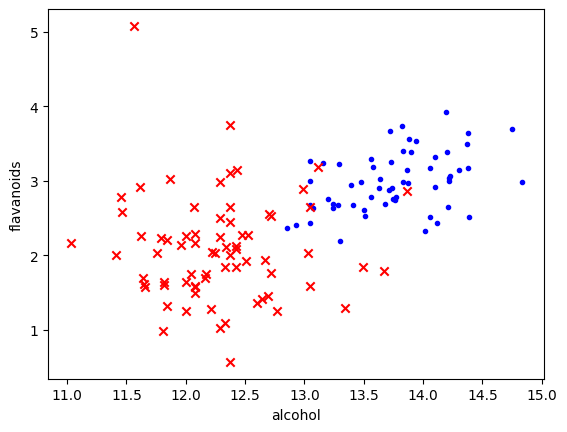

In [10]:
plt.scatter(df0['alcohol'], df0['flavanoids'], color='blue', label='0', marker='.')
plt.scatter(df1['alcohol'], df1['flavanoids'], color='red', label='1', marker='x')

plt.xlabel('alcohol')
plt.ylabel('flavanoids')



---



**"plt.scatter(df0['color_intensity'], df0['hue'], color='blue', label='0', marker='.')"** plots a scatter diagram using the **'color_intensity'** and **'hue'** columns from df0 with blue markers in the shape of **"."**. 

**"plt.scatter(df1['color_intensity'], df1['hue'], color='red', label='1', marker='x')"** plots a scatter diagram using the **'color_intensity'** and **'hue'** columns from df0 with red markers in the shape of **"x"**. 

**"plt.xlabel('color_intensity')"** labels the x-axis as **"color_intensity"** and
**"plt.ylabel('hue')"** labels the y-axis as **"hue"**

Text(0, 0.5, 'hue')

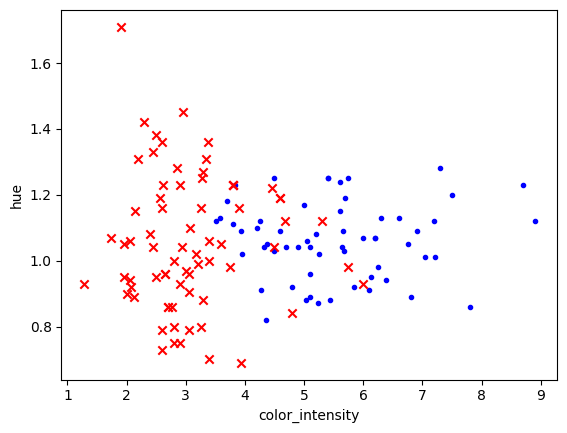

In [11]:
plt.scatter(df0['color_intensity'], df0['hue'], color='blue', label='0', marker='.')
plt.scatter(df1['color_intensity'], df1['hue'], color='red', label='1', marker='x')

plt.xlabel('color_intensity')
plt.ylabel('hue')



---





---



## **2. Using the Suport Vector Machine Model**

**"from sklearn.model_selection import train_test_split"** imports the train_test_split function from the **"sklearn.model_selection"** module.

 The **"train_test_split"** function is used to split a dataset into training and testing subsets and it randomly partitions the data into two or more sets, that are used for the purpose of training a model on one set and evaluating its performance on the other.

In [12]:
from sklearn.model_selection import train_test_split



---



**"X"** is assigned the DataFrame with the target column dropped. **"df.drop(['target'], axis='columns')""** function is used to remove the 'target' column along the columns axis.

**"y"** is assigned the target column from the DataFrame.

In [13]:
X = df.drop(['target'], axis='columns')
y = df.target



---



**"train_test_split(X, y, test_size=0.2)"** fuction slits the dataset with 80% of the data used for training and 20% for testing.

on execution, 4 subsets will be created;
1. **X_train**
2. **X_test**
3. **y_train**
4. **y_test**

1 is used to train X values and 2 is used to test X values. 3 is used to train target values and 4 is used to test tehe target values. 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



---



**"len(X_train)"** prints the number of **X_train** values 

In [15]:
len(X_train)

142



---



**"len(X_test)"** prints the number of **X_test** values 

In [16]:
len(X_test)

36



---



 **""from sklearn.svm import SVC"** imports the Support Vector Classifier (SVC) class from the **"sklearn.svm module"**.

 **""model = SVC(C=10)""** initializes the SVC class with the regularization parameter **"C"** set to 10. 

In [17]:
from sklearn.svm import SVC

model = SVC(C=10)



---



**""model.fit(X_train, y_train)""** function trains the SVM model, **"model"** using the training features **X_train** and corresponding target values **y_train**

In [18]:
model.fit(X_train, y_train)

SVC(C=10)



---



**""model.score(X_test, y_test)""** evaluates the performance of the SVM model **model** on the testing data by calculating the accuracy score.

we assess the performance using **"score()"** method.

In [19]:
model.score(X_test, y_test)

0.6111111111111112



---



**""from sklearn.metrics import confusion_matrix""** imports the confusion_matrix function from the **""sklearn.metrics module""**.

**""y_pred = model.predict(X_test)""** uses the trained SVM model to predict the target values for the testing features **X_test**.

**""cm = confusion_matrix(y_test, y_pred)""** calculates the confusion matrix based on the predicted target values **y_pred** and the true target values **y_test**.

**""cm""** represents the confusion matrix that was calculated using the **confusion_matrix()** function.

In [20]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  1],
       [ 1,  8,  4],
       [ 2,  6,  2]])



---



**""import seaborn as sns""** imports the seaborn library, which is a data visualization library built on top of matplotlib and provides additional plot styles and functionalities.

**""plt.figure(figsize=(7, 5))""** line creates a new figure with a specified size of 7 inches in width and 5 inches in height.

**""sns.heatmap(cm, annot=True)""** creates a heatmap using the **heatmap()** function and **cm** represents the confusion matrix which is passed as the data for the heatmap. The **annot=True** displays the values of the matrix within the heatmap cells.

Text(58.222222222222214, 0.5, 'Truth')

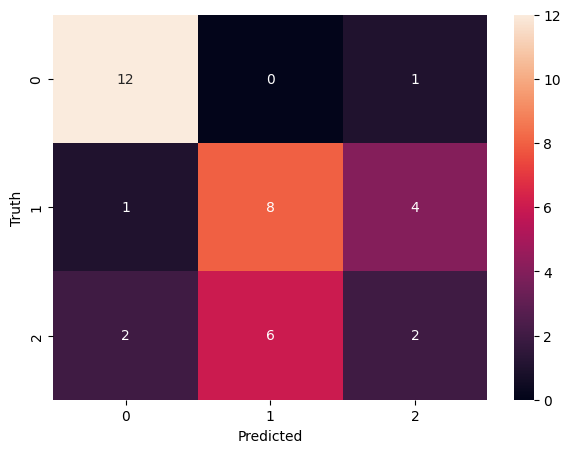

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')



---



**""from sklearn.metrics import classification_report""** imports the **classification_report** function from the **sklearn.metrics** module.

**classification_report()** function generates a report that includes metrics;
 
1. precision
2. recall 
3. F1-score
4. support 

for each class.

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.57      0.62      0.59        13
           2       0.29      0.20      0.24        10

    accuracy                           0.61        36
   macro avg       0.55      0.58      0.56        36
weighted avg       0.57      0.61      0.59        36





---





---



## **3. K Nearest Neighbors**

**"from sklearn.model_selection import train_test_split"** imports the train_test_split function from the **"sklearn.model_selection"** module.

 The **"train_test_split"** function is used to split a dataset into training and testing subsets and it randomly partitions the data into two or more sets, that are used for the purpose of training a model on one set and evaluating its performance on the other.

In [23]:
from sklearn.model_selection import train_test_split



---



**"X"** is assigned the DataFrame with the target column dropped. **"df.drop(['target'], axis='columns')""** function is used to remove the 'target' column along the columns axis.

**"y"** is assigned the target column from the DataFrame.

In [24]:
X = df.drop(['target'], axis='columns')
y = df.target



---



**"train_test_split(X, y, test_size=0.2)"** fuction slits the dataset with 80% of the data used for traing and 20% for testing.

on execution, 4 subsets will be created;
1. **X_train**
2. **X_test**
3. **y_train**
4. **y_test**

1 is used to train X values and 2 is used to test X values. 3 is used to train target values and 4 is used to test tehe target values. 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



---



**"from sklearn.neighbors import KNeighborsClassifier"** imports the **KNeighborsClassifier** class from **the sklearn.neighbors** module.

**""knn = KNeighborsClassifier(n_neighbors=10)""** initializes KNN Classifier with **n_neighbors=10** is the number of neighbors. 

**""knn.fit(X_train, y_train)""** trains the KNN classifier using the training data by calling the fit method. We train using **X_train** parameter which represents the features of the training data, and the **y_train** parameter which represents the corresponding target values.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)



---



**""knn.score(X_test, y_test)""** evaluates the performance of the KNN Classifier **knn** on the testing data by calculating the accuracy score.

In [27]:
knn.score(X_test, y_test)

0.6388888888888888



---



**""from sklearn.metrics import confusion_matrix""** imports the confusion_matrix function from the **""sklearn.metrics module""**.

**""y_pred = model.predict(X_test)""** uses the trained KNN Clasifier to predict the target values for the testing features **X_test**.

**""zm = confusion_matrix(y_test, y_pred)""** calculates the confusion matrix based on the predicted target values **y_pred** and the true target values **y_test**.

**""zm""** represents the confusion matrix that was calculated using the **confusion_matrix()** function.

In [28]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

zm = confusion_matrix(y_test, y_pred)
zm

array([[11,  0,  2],
       [ 1, 10,  3],
       [ 2,  5,  2]])



---



**""import seaborn as sns""** imports the seaborn library, which is a data visualization library built on top of matplotlib and provides additional plot styles and functionalities.

**""plt.figure(figsize=(7, 5))""** line creates a new figure with a specified size of 7 inches in width and 5 inches in height.

**""sns.heatmap(zm, annot=True)""** creates a heatmap using the **heatmap()** function and **zm** represents the confusion matrix which is passed as the data for the heatmap. The **annot=True** displays the values of the matrix within the heatmap cells.

Text(58.222222222222214, 0.5, 'Truth')

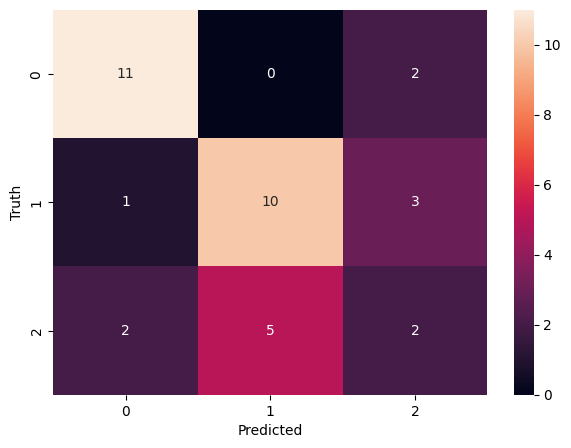

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(zm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')



---



**""from sklearn.metrics import classification_report""** imports the **classification_report** function from the **sklearn.metrics** module.

**classification_report()** function generates a report that includes metrics;
 
1. precision
2. recall 
3. F1-score
4. support 

for each class.

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.67      0.71      0.69        14
           2       0.29      0.22      0.25         9

    accuracy                           0.64        36
   macro avg       0.58      0.59      0.58        36
weighted avg       0.61      0.64      0.62        36





---





---



## **4. Gaussian Naive Bayes Classifier**

**"from sklearn.model_selection import train_test_split"** imports the train_test_split function from the **"sklearn.model_selection"** module.

 The **"train_test_split"** function is used to split a dataset into training and testing subsets and it randomly partitions the data into two or more sets, that are used for the purpose of training a model on one set and evaluating its performance on the other.

In [31]:
from sklearn.model_selection import train_test_split



---



**"X"** is assigned the DataFrame with the target column dropped. **"df.drop(['target'], axis='columns')""** function is used to remove the 'target' column along the columns axis.

**"y"** is assigned the target column from the DataFrame.

In [32]:
X = df.drop(['target'], axis='columns')
y = df.target



---



**"train_test_split(X, y, test_size=0.2)"** fuction slits the dataset with 80% of the data used for traing and 20% for testing.

on execution, 4 subsets will be created;
1. **X_train**
2. **X_test**
3. **y_train**
4. **y_test**

1 is used to train X values and 2 is used to test X values. 3 is used to train target values and 4 is used to test tehe target values. 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



---



**""from sklearn.naive_bayes import GaussianNB""** imports the **GaussianNB** class from the **sklearn.naive_bayes** module.

**"GB = GaussianNB()"** creates an instance of the Gaussian Naive Bayes classifier by initializing the GB object.

**""GB.fit(X_train, y_train)""** trains the Gaussian Naive Bayes classifier using the training data by calling the fit method. We train using **X_train** parameter which represents the features of the training data, and the **y_train** parameter which represents the corresponding target values.

In [34]:
from sklearn.naive_bayes import GaussianNB

GB = GaussianNB()
GB.fit(X_train, y_train)

GaussianNB()



---



**""GB.score(X_test, y_test)""** evaluates the performance of the KNN Classifier **knn** on the testing data by calculating the accuracy score.


In [35]:
GB.score(X_test, y_test)

0.9722222222222222



---



**""GB.predict_proba(X_test[:10])""** returns the predicted probabilities of each class for the first 10 samples in **X_test**.

The **predict_proba()** method is used to predict class probabilities for input samples. 

In [36]:
GB.predict_proba(X_test[:10])

array([[7.71334770e-15, 1.00000000e+00, 8.49466761e-11],
       [1.33456607e-28, 2.14945608e-07, 9.99999785e-01],
       [5.17578867e-09, 9.99999995e-01, 8.68139369e-14],
       [2.37379870e-20, 6.94329994e-07, 9.99999306e-01],
       [3.15631020e-08, 9.99999968e-01, 8.12864575e-18],
       [9.99583976e-01, 4.16024199e-04, 1.84426424e-19],
       [4.12738743e-08, 9.99999959e-01, 2.47771636e-19],
       [8.87943790e-09, 9.99999991e-01, 3.13442727e-27],
       [9.99999997e-01, 3.39109705e-09, 5.06382233e-34],
       [5.09555800e-15, 9.99999571e-01, 4.28588976e-07]])



---



**""from sklearn.metrics import confusion_matrix""** imports the confusion_matrix function from the **""sklearn.metrics module""**.

**""y_pred = GB.predict(X_test)""** uses the trained KNN Clasifier to predict the target values for the testing features **X_test**.

**""sm = confusion_matrix(y_test, y_pred)""** calculates the confusion matrix based on the predicted target values **y_pred** and the true target values **y_test**.

**""sm""** represents the confusion matrix that was calculated using the **confusion_matrix()** function.

In [37]:
from sklearn.metrics import confusion_matrix

y_pred = GB.predict(X_test)

sm = confusion_matrix(y_test, y_pred)
sm

array([[11,  0,  0],
       [ 1, 11,  0],
       [ 0,  0, 13]])



---



**""import seaborn as sns""** imports the seaborn library, which is a data visualization library built on top of matplotlib and provides additional plot styles and functionalities.

**""plt.figure(figsize=(7, 5))""** line creates a new figure with a specified size of 7 inches in width and 5 inches in height.

**""sns.heatmap(zm, annot=True)""** creates a heatmap using the **heatmap()** function and **zm** represents the confusion matrix which is passed as the data for the heatmap. The **annot=True** displays the values of the matrix within the heatmap cells.


Text(58.222222222222214, 0.5, 'Truth')

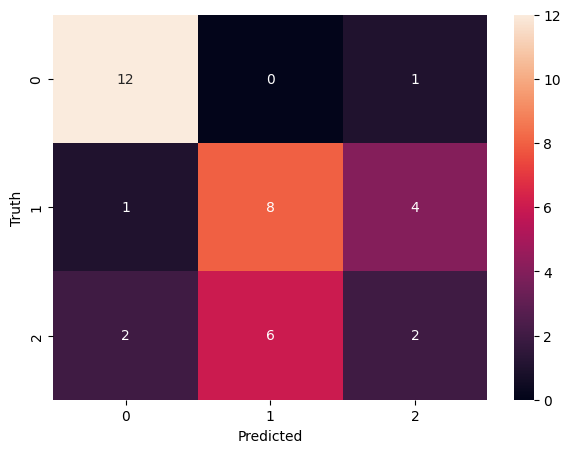

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')



---



**""from sklearn.metrics import classification_report""** imports the **classification_report** function from the **sklearn.metrics** module.

**classification_report()** function generates a report that includes metrics;
 
1. precision
2. recall 
3. F1-score
4. support 

for each class.

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.92      0.96        12
           2       1.00      1.00      1.00        13

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36





---

